In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.font_manager
from sklearn import svm
from sklearn.ensemble import IsolationForest
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [3]:
data = pd.read_csv('E:\\Python\\AML\\HW9\\Kobe.csv')

In [4]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

# Проводим анализ данных.

In [6]:
# Size of the dataset

data.shape

(30697, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [8]:
# типы данных и количество нулевых значений
pd.DataFrame(data = {"featurs":data.dtypes.values,
                     "is null":data.isnull().sum().values},
             index = data.dtypes.index)

,featurs,is null
action_type,object,0
combined_shot_type,object,0
game_event_id,int64,0
game_id,int64,0
lat,float64,0
loc_x,int64,0
loc_y,int64,0
lon,float64,0
minutes_remaining,int64,0
period,int64,0


In [9]:
Shots_to_predict = data[data['shot_made_flag'].isnull()]
Shots_to_train = data[data['shot_made_flag'].notna()]

In [10]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass  

In [11]:
def get_value(X, column, mode='mean', value=0, columns_for_reg=None):
  if mode == 'value':
    X.loc[X[X[column].isna()].index ,column] = value
  elif mode == 'max':
    X.loc[X[X[column].isna()].index ,column] = X[column].max()
  elif mode == 'min':
    X.loc[X[X[column].isna()].index ,column] = X[column].min()
  elif mode == 'median':
    X.loc[X[X[column].isna()].index ,column] = X[column].median()    
  elif mode == 'mode':
    X.loc[X[X[column].isna()].index, column] = X[column].mode()[0]  
  elif mode == 'indicator':
    X.loc[X[X[column].isna()].index, column] = 0
    X['ind_'+str(column)] = 1
    X.loc[X[X[column].isna()].index, 'ind_'+str(column)] = 0
  elif mode == 'linreg':
    if columns_for_reg is None:
      cols = list(X.select_dtypes([np.number]).columns) 
      cols.remove(column)
    X_tmp = X.dropna()  
    m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
    X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
  else:
    X.loc[X[X[column].isna()].index, column] = X[column].mean()
  return X  

In [12]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

In [13]:
data['action_type'].unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Driving Layup Shot', 'Reverse Layup Shot',
       'Reverse Dunk Shot', 'Slam Dunk Shot', 'Turnaround Jump Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Running Tip Shot',
       'Jump Hook Shot', 'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Reverse Layup Shot',
       'Driving Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Reverse Slam Dunk Shot', 'Turnaround Bank shot',
   

In [14]:
data_processed = get_one_hot(data, cols=['action_type', 'combined_shot_type','season', 'shot_type', 'shot_zone_area', 
                                         'shot_zone_basic', 'shot_zone_range', 'team_name', 'matchup', 'opponent'])
data_processed.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,0,0,1,0,0,0,0,0,0,0
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0,0,1,0,0,0,0,0,0,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,0,0,1,0,0,0,0,0,0,0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0,0,1,0,0,0,0,0,0,0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,0,0,1,0,0,0,0,0,0,0


In [15]:
exclude_columns = ['action_type', 'combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 
                                         'shot_zone_basic', 'shot_zone_range', 'team_name', 'matchup', 'opponent']

In [16]:
data_processed = data_processed.drop(columns=exclude_columns)

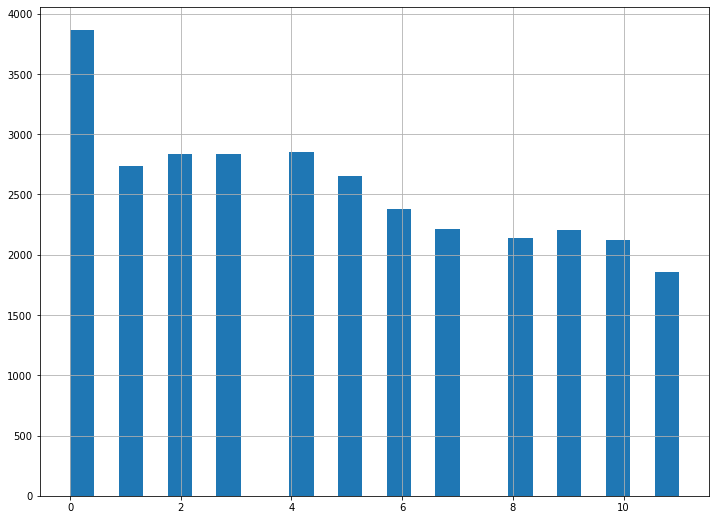

In [17]:
data_processed['minutes_remaining'].hist(bins=25, figsize=(12,9))

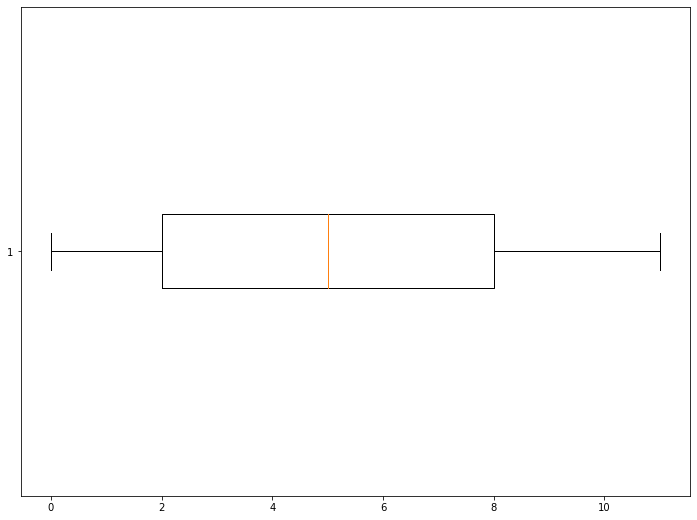

In [18]:
red_square = dict(markerfacecolor='r', marker='s') # выделим предполагаемые выбросы
fig, ax = plt.subplots(figsize=(12,9))
ax.boxplot(data_processed['minutes_remaining'], vert=False, flierprops=red_square)
plt.show()

In [19]:
data_processed['game_date'] = pd.to_datetime(data_processed['game_date'])

In [20]:
data_processed['game_date'] = [t.timestamp() for t in data_processed['game_date']]

In [21]:
data_processed['game_date'] -= data_processed['game_date'].mean()
data_processed['game_date'] /= data_processed['game_date'].std()

In [22]:
data_processed['game_date']

0       -1.174219
1       -1.174219
2       -1.174219
3       -1.174219
4       -1.174219
           ...   
30692   -1.249976
30693   -1.249976
30694   -1.249976
30695   -1.249976
30696   -1.249976
Name: game_date, Length: 30697, dtype: float64

In [23]:
Shots_to_predict = data_processed[data_processed['shot_made_flag'].isnull()]
Shots_to_train = data_processed[data_processed['shot_made_flag'].notna()]

# Обучаем линейную модель, Lasso, Ridge 

In [24]:
X = Shots_to_train.drop(columns='shot_made_flag')
y = Shots_to_train['shot_made_flag']

In [25]:
lin_regr = LinearRegression()
lin_regr.fit(X, y)

LinearRegression()

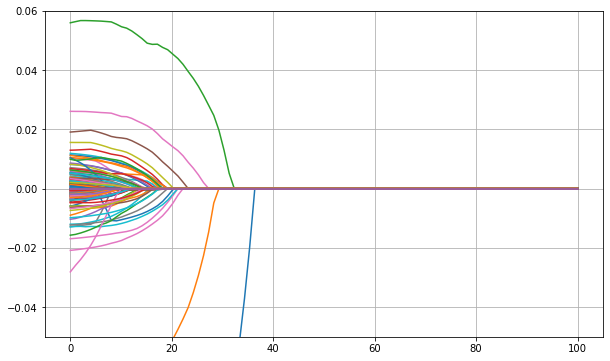

In [101]:
X_sc = StandardScaler().fit_transform(X)
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

for i in range(len(list_l)):
  m_l = Lasso(alpha=list_l[i]).fit(X_sc, y)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

plt.figure(figsize=[10,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.06)       
plt.grid() 

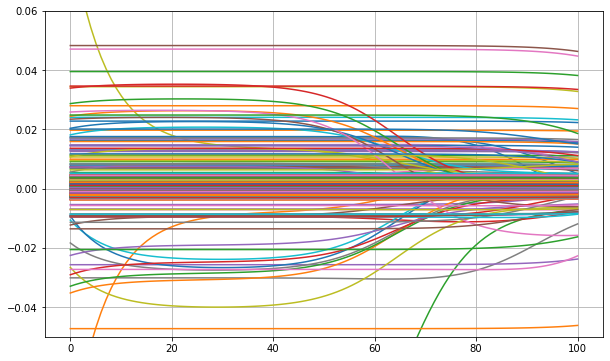

In [106]:
X_sc = StandardScaler().fit_transform(X)
lg_r,pred_r = [], []

list_r=list(2**np.linspace(-10,10,100))

for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(X_sc, y)
  lg_r.append(m_l)
  pred_r.append(m_r.coef_)

plt.figure(figsize=[10,6])
x_r = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_r,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.06)       
plt.grid() 

# Строим PCA на подготовленных признаках,

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [27]:
XPCAreduced

array([[-1.16509085e+09],
       [ 2.80100116e+09],
       [-1.16512538e+09],
       [-1.16512968e+09],
       [-1.16511620e+09],
       [-1.16514978e+09],
       [-1.16513004e+09],
       [-1.16513042e+09],
       [-1.16513080e+09],
       [-1.16512629e+09],
       [-1.16512867e+09],
       [ 2.57020664e+11],
       [-1.16513082e+09],
       [-1.16267362e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513081e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.16513082e+09],
       [-1.1